In [229]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [230]:
x_train = np.random.uniform(-1.5, 1.5, (20000,2)) 
#y_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, (2000,2))
#y_valid = np.random.uniform(-1.5, 1.5, 100)
#x_valid.sort()
#y_valid.sort()
z_target = np.sin(x_valid[:,0]**2+x_valid[:,1]**2)

sigma = 0.2 # noise standard deviation, for the moment it is absent
z_train= np.random.normal(np.sin(x_train[:,0]**2+x_train[:,1]**2), sigma)
z_valid= np.random.normal(np.sin(x_valid[:,0]**2+x_valid[:,1]**2), sigma)

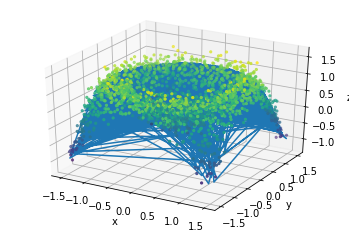

<Figure size 1440x1440 with 0 Axes>

In [231]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_valid[:,0], x_valid[:,1], z_target)
ax.scatter(x_valid[:,0], x_valid[:,1], z_valid, c=z_valid, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(10, 30)
plt.show()


In [232]:
# compose the NN model
model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,))) #ho una sola ascissa come input
model.add(Dense(30, input_shape=(2,), activation='tanh'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30, activation='sigmoid'))
#model.add(Dense(15, activation='softplus'))
model.add(Dense(10, activation='softsign'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='softplus'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #ho un solo layer con un neurone
#mse=nean square error
#in questo caso semplice, ha tutto per poter lavorare

In [233]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_69 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_70 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_72 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 6         
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________


In [234]:
#x1=np.array[x_train], [y_train]]
history = model.fit(x_valid, z_valid, 
          batch_size=32, epochs=600,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

Train on 2000 samples, validate on 2000 samples
Epoch 1/600
2000/2000 [==============================] - 1s 723us/sample - loss: 0.2022 - mean_squared_error: 0.2022 - val_loss: 0.1893 - val_mean_squared_error: 0.1893
Epoch 2/600
2000/2000 [==============================] - 1s 344us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 3/600
2000/2000 [==============================] - 1s 306us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 4/600
2000/2000 [==============================] - 1s 360us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 5/600
2000/2000 [==============================] - 1s 256us/sample - loss: 0.1893 - mean_squared_error: 0.1893 - val_loss: 0.1891 - val_mean_squared_error: 0.1891
Epoch 6/600
2000/2000 [==============================] - 0s 242us/sample - loss: 0.1893 - mean_squared_erro

Epoch 49/600
2000/2000 [==============================] - 0s 177us/sample - loss: 0.1885 - mean_squared_error: 0.1885 - val_loss: 0.1883 - val_mean_squared_error: 0.1883
Epoch 50/600
2000/2000 [==============================] - 0s 248us/sample - loss: 0.1885 - mean_squared_error: 0.1885 - val_loss: 0.1883 - val_mean_squared_error: 0.1883
Epoch 51/600
2000/2000 [==============================] - 0s 177us/sample - loss: 0.1884 - mean_squared_error: 0.1884 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 52/600
2000/2000 [==============================] - 0s 189us/sample - loss: 0.1884 - mean_squared_error: 0.1884 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 53/600
2000/2000 [==============================] - 0s 173us/sample - loss: 0.1884 - mean_squared_error: 0.1884 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 54/600
2000/2000 [==============================] - 0s 189us/sample - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.1881 - val_mean_sq

2000/2000 [==============================] - 0s 174us/sample - loss: 0.1865 - mean_squared_error: 0.1865 - val_loss: 0.1862 - val_mean_squared_error: 0.1862
Epoch 98/600
2000/2000 [==============================] - 0s 180us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.1870 - val_mean_squared_error: 0.1870
Epoch 99/600
2000/2000 [==============================] - 0s 249us/sample - loss: 0.1865 - mean_squared_error: 0.1865 - val_loss: 0.1861 - val_mean_squared_error: 0.1861
Epoch 100/600
2000/2000 [==============================] - 0s 170us/sample - loss: 0.1863 - mean_squared_error: 0.1863 - val_loss: 0.1860 - val_mean_squared_error: 0.1860
Epoch 101/600
2000/2000 [==============================] - 0s 168us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.1859 - val_mean_squared_error: 0.1859
Epoch 102/600
2000/2000 [==============================] - 0s 168us/sample - loss: 0.1861 - mean_squared_error: 0.1861 - val_loss: 0.1858 - val_mean_squared_erro

Epoch 145/600
2000/2000 [==============================] - 1s 353us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.1805 - val_mean_squared_error: 0.1805
Epoch 146/600
2000/2000 [==============================] - 1s 458us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.1796 - val_mean_squared_error: 0.1796
Epoch 147/600
2000/2000 [==============================] - 1s 254us/sample - loss: 0.1796 - mean_squared_error: 0.1796 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 148/600
2000/2000 [==============================] - 1s 270us/sample - loss: 0.1796 - mean_squared_error: 0.1796 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 149/600
2000/2000 [==============================] - 1s 336us/sample - loss: 0.1794 - mean_squared_error: 0.1794 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 150/600
2000/2000 [==============================] - 0s 203us/sample - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.1785 - val_m

Epoch 193/600
2000/2000 [==============================] - 1s 326us/sample - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.1677 - val_mean_squared_error: 0.1677
Epoch 194/600
2000/2000 [==============================] - 1s 254us/sample - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.1674 - val_mean_squared_error: 0.1674
Epoch 195/600
2000/2000 [==============================] - 0s 229us/sample - loss: 0.1676 - mean_squared_error: 0.1676 - val_loss: 0.1669 - val_mean_squared_error: 0.1669
Epoch 196/600
2000/2000 [==============================] - 0s 210us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 0.1668 - val_mean_squared_error: 0.1668
Epoch 197/600
2000/2000 [==============================] - 1s 298us/sample - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.1677 - val_mean_squared_error: 0.1677
Epoch 198/600
2000/2000 [==============================] - 0s 206us/sample - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.1680 - val_m

Epoch 241/600
2000/2000 [==============================] - 1s 266us/sample - loss: 0.1506 - mean_squared_error: 0.1506 - val_loss: 0.1488 - val_mean_squared_error: 0.1488
Epoch 242/600
2000/2000 [==============================] - 0s 196us/sample - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 243/600
2000/2000 [==============================] - 1s 346us/sample - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 244/600
2000/2000 [==============================] - 0s 213us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.1473 - val_mean_squared_error: 0.1473
Epoch 245/600
2000/2000 [==============================] - 1s 270us/sample - loss: 0.1483 - mean_squared_error: 0.1483 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 246/600
2000/2000 [==============================] - 1s 278us/sample - loss: 0.1482 - mean_squared_error: 0.1482 - val_loss: 0.1462 - val_m

Epoch 289/600
2000/2000 [==============================] - 1s 270us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 290/600
2000/2000 [==============================] - 1s 271us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 291/600
2000/2000 [==============================] - 1s 440us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 292/600
2000/2000 [==============================] - 1s 355us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.1178 - val_mean_squared_error: 0.1178
Epoch 293/600
2000/2000 [==============================] - 0s 220us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 294/600
2000/2000 [==============================] - 1s 331us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1143 - val_m

Epoch 337/600
2000/2000 [==============================] - 1s 270us/sample - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0869 - val_mean_squared_error: 0.0869
Epoch 338/600
2000/2000 [==============================] - 1s 374us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 339/600
2000/2000 [==============================] - 1s 259us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 340/600
2000/2000 [==============================] - 0s 240us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 341/600
2000/2000 [==============================] - 1s 273us/sample - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 342/600
2000/2000 [==============================] - 1s 295us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0838 - val_m

2000/2000 [==============================] - 1s 302us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 385/600
2000/2000 [==============================] - 1s 319us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0679 - val_mean_squared_error: 0.0679
Epoch 386/600
2000/2000 [==============================] - 0s 198us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 387/600
2000/2000 [==============================] - 0s 204us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 388/600
2000/2000 [==============================] - 0s 224us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 389/600
2000/2000 [==============================] - 1s 261us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0696 - val_mean_squared_er

Epoch 432/600
2000/2000 [==============================] - 1s 359us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 433/600
2000/2000 [==============================] - 0s 248us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 434/600
2000/2000 [==============================] - 1s 285us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 435/600
2000/2000 [==============================] - 1s 282us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 436/600
2000/2000 [==============================] - 1s 300us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0679 - val_mean_squared_error: 0.0679
Epoch 437/600
2000/2000 [==============================] - 0s 195us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0592 - val_m

Epoch 480/600
2000/2000 [==============================] - 1s 252us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 481/600
2000/2000 [==============================] - 0s 237us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 482/600
2000/2000 [==============================] - 0s 219us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 483/600
2000/2000 [==============================] - 0s 198us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 484/600
2000/2000 [==============================] - 1s 284us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0601 - val_mean_squared_error: 0.0601
Epoch 485/600
2000/2000 [==============================] - 0s 198us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0580 - val_m

Epoch 528/600
2000/2000 [==============================] - 1s 356us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 529/600
2000/2000 [==============================] - 1s 368us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0687 - val_mean_squared_error: 0.0687
Epoch 530/600
2000/2000 [==============================] - 1s 266us/sample - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 531/600
2000/2000 [==============================] - 1s 390us/sample - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 532/600
2000/2000 [==============================] - 0s 240us/sample - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 533/600
2000/2000 [==============================] - 1s 253us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0558 - val_m

Epoch 576/600
2000/2000 [==============================] - 1s 300us/sample - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 577/600
2000/2000 [==============================] - 1s 271us/sample - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 578/600
2000/2000 [==============================] - 0s 201us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 579/600
2000/2000 [==============================] - 1s 284us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0582 - val_mean_squared_error: 0.0582
Epoch 580/600
2000/2000 [==============================] - 1s 269us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 581/600
2000/2000 [==============================] - 1s 310us/sample - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0554 - val_m

In [235]:
# get a summary of our composed model
from tensorflow.keras.models import load_model
save_model_path='Modelli_4/Modello_8.mod'
model.save(filepath=save_model_path, include_optimizer=True)

In [236]:
# evaluate model
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2000/2000 [==============================] - 0s 130us/sample - loss: 0.0524 - mean_squared_error: 0.0524

Test loss: 0.052422578275203705
Test accuracy: 0.052422576


In [237]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2000/2000 [==============================] - 0s 151us/sample - loss: 0.0179 - mean_squared_error: 0.0179

Test loss: 0.017908755965530872
Test accuracy: 0.017908758


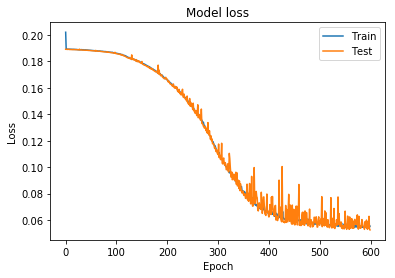

In [238]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

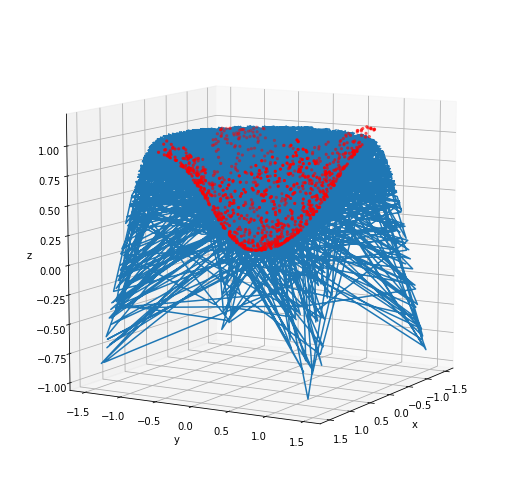

In [239]:
x_predicted = np.random.uniform(-1, 1, (1000,2))
z_predicted = model.predict(x_predicted)
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,9))
#plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, marker='.', color='r')
ax.plot(x_valid[:,0], x_valid[:,1], z_target)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()
